# Global Power Plant Database
Problem Statement:

In [215]:
import pandas as pd
#Importing necessary libraries for classification & regression.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

#Libraries for classification model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report

#Libraries for Regression model
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder

import pickle


import warnings
warnings.filterwarnings("ignore")

In [216]:
df=pd.read_csv("Desktop/database_IND.csv")
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [217]:
#Finding the shape of dataset
df.shape

(907, 27)

In [218]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [219]:
#finding the null values
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [220]:
#Finding the fuel type 1 count
df["other_fuel1"].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [221]:
#Finding the fuel type 2 count
df["other_fuel2"].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [222]:
#Finding the fuel type 3 count
df["other_fuel3"].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [223]:
#Finding the primary fuel count
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [224]:
#From above dataset it is observed that pther_fuel2 & 3 column having null values. There is no dataset present.
#Hence it is better to remove those two columns from dataset

In [225]:
df.drop("other_fuel2",axis=1, inplace=True)
df.drop("other_fuel3",axis=1, inplace=True)

In [226]:

df.drop("wepp_id",axis=1, inplace=True)
df.drop("generation_gwh_2019",axis=1, inplace=True)
df.drop("estimated_generation_gwh",axis=1, inplace=True)


In [227]:
df.drop("generation_gwh_2013",axis=1, inplace=True)

In [228]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [229]:
#New Datashape 
df.shape

(907, 21)

In [230]:
#We have bring down to 27 column to 21 column

In [231]:
#Checking duplicate values

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [232]:
#Describing the data
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [233]:
cols=["capacity_mw","commissioning_year","year_of_capacity_data","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]

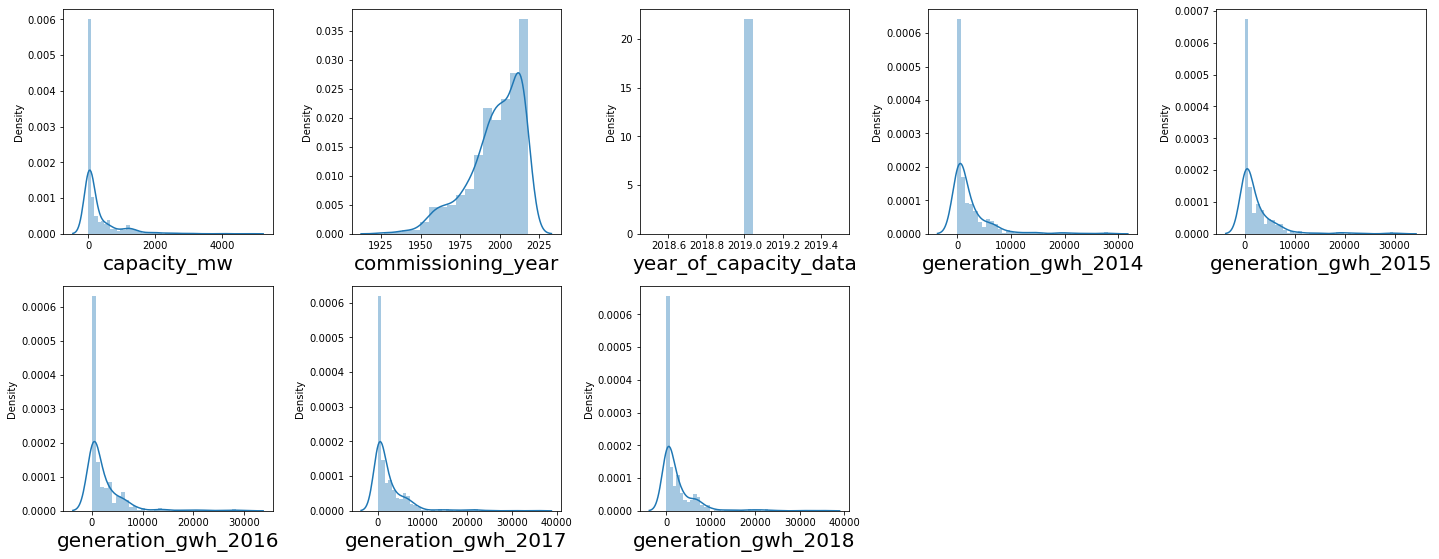

In [234]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(20,15))
plotnumber=1

for column in cols:
    if plotnumber<=10:
        ax=plt.subplot(4,5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

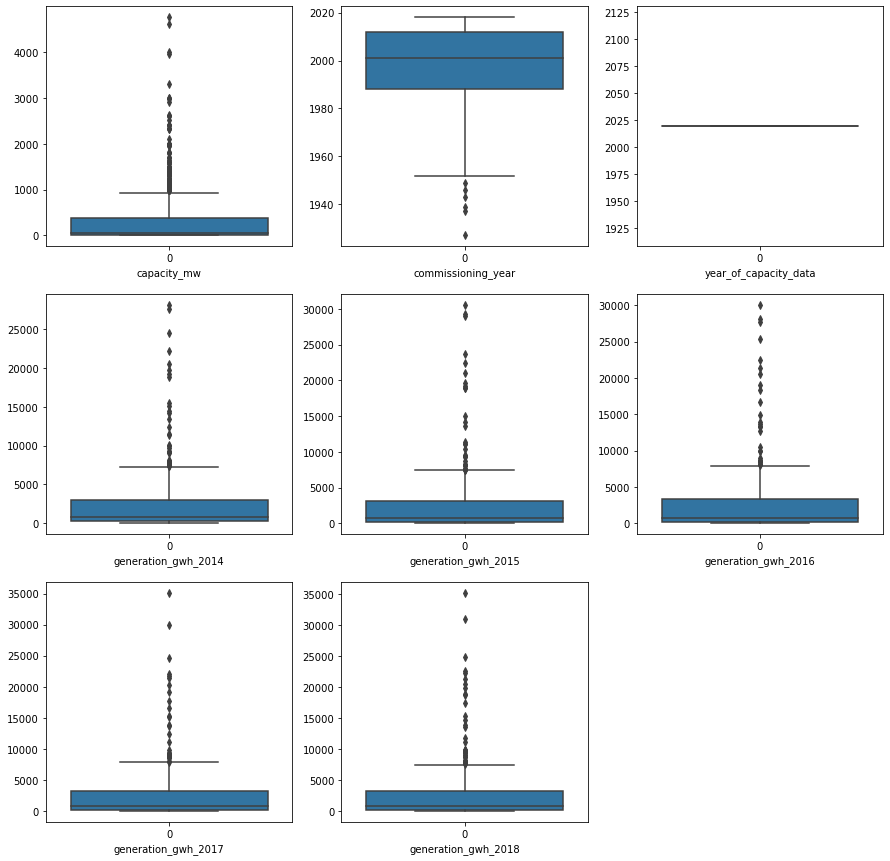

In [235]:
#Finding the outliers using Box plot
    #Finding the outliers using boxplot

plt.figure(figsize=(15,15))
graph=1

for column in cols:
    
    if graph<=10:
        
        plt.subplot(3,3, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=10)
    

    graph+=1

plt.show()

In [238]:
df.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [239]:
df["generation_data_source"].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [240]:
df["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

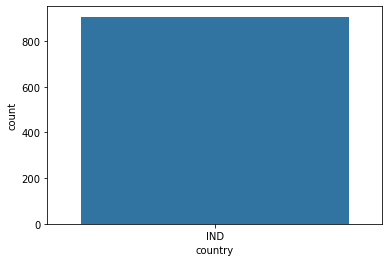

In [241]:
sns.countplot(df["country"])

In [242]:
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

-This is the data of Indian Power plants.

In [243]:
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

-10 or 12 character identifier for the power plant. 

In [244]:
#Name of Power Plants
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

-This is the dataset of 907 different power plant 

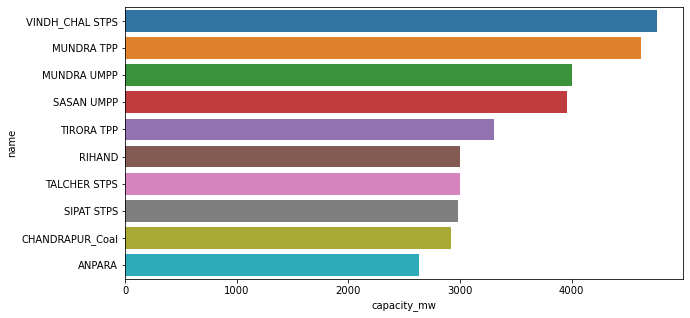

In [245]:
#Finding top 10 countries which is having highest capacity in mw

plt.figure(figsize=(10,5))
sns.barplot(x="capacity_mw",
           y="name",
           data=df.nlargest(10,"capacity_mw"))
plt.show()

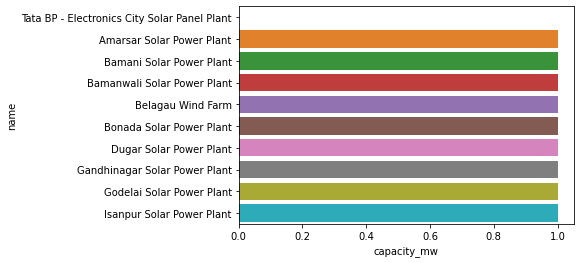

In [246]:
#Finding top 10 countries which is having lowest capacity in mw
sns.barplot(x="capacity_mw",
           y="name",
           data=df.nsmallest(10,"capacity_mw"))


plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1927.0'),
  Text(1, 0, '1937.0'),
  Text(2, 0, '1939.0'),
  Text(3, 0, '1943.0'),
  Text(4, 0, '1946.0'),
  Text(5, 0, '1949.0'),
  Text(6, 0, '1952.0'),
  Text(7, 0, '1953.0'),
  Text(8, 0, '1954.0'),
  Text(9, 0, '1955.0'),
  Text(10, 0, '1956.0'),
  Text(11, 0, '1957.0'),
  Text(12, 0, '1958.0'),
  Text(13, 0, '1959.0'),
  Text(14, 0, '1960.0'),
  Text(15, 0, '1961.0'),
  Text(16, 0, '1962.0'),
  Text(17, 0, '1963.0'),
  Text(18, 0, '1964.0'),
  Text(19, 0, '1965.0'),
  Text(20, 0, '1966.0'),
  Text(21, 0, '1967.0'),
  Text(22, 0, '1968.0'),
  Text(23, 0, '1969.0'),
  Text(24, 0, '1970.0'),
  Text(25, 0, '1971.0'),
  Text(26, 0, '1972.0'),
 

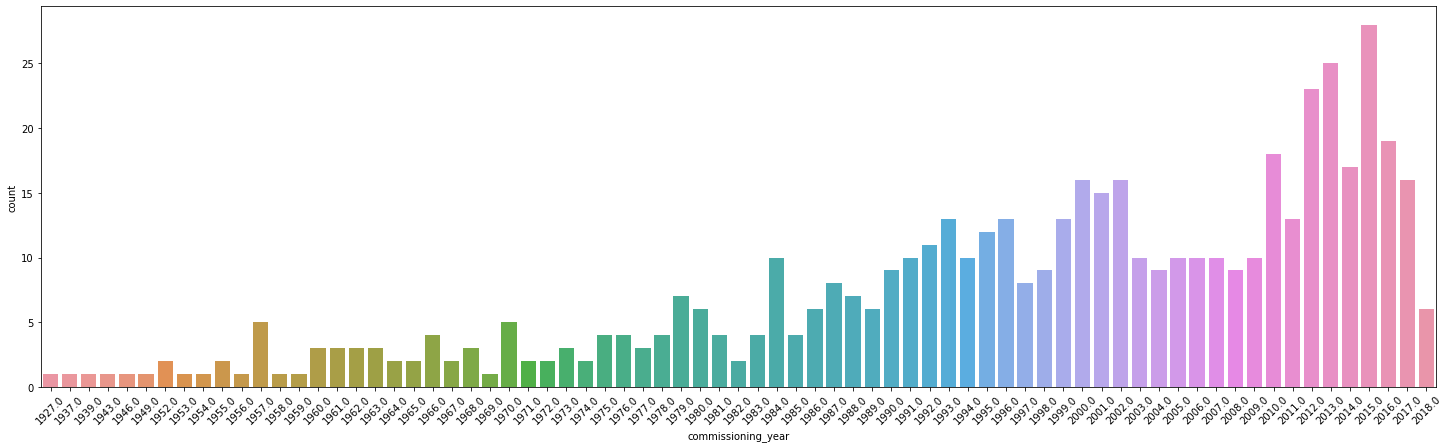

In [247]:
plt.figure(figsize=(25,7))
sns.countplot(df["commissioning_year"])

plt.xticks(rotation = 45)

In [248]:
df["commissioning_year"].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

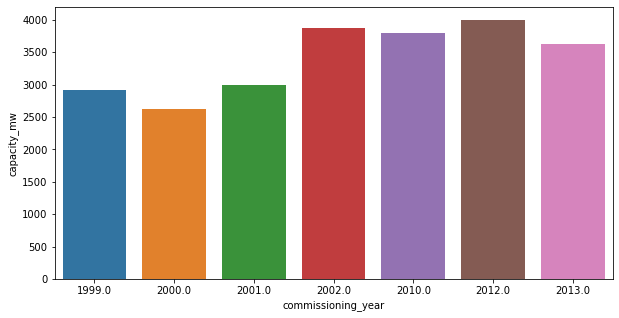

In [249]:
#Finding commissioning year which is having highest capacity in mw

plt.figure(figsize=(10,5))
sns.barplot(y="capacity_mw",
           x="commissioning_year",
           data=df.nlargest(10,"capacity_mw"), ci=None)
plt.show()

In [250]:
df["geolocation_source"].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [251]:
#Finding which primary fuel required for primary plant operation
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

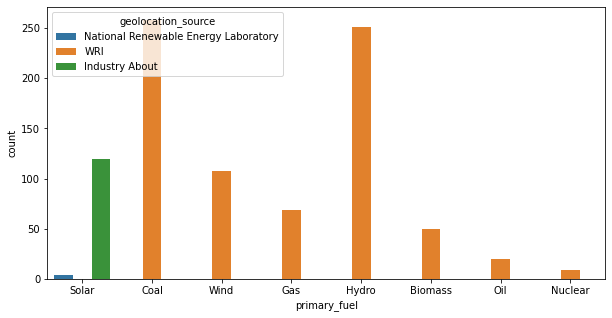

In [252]:
plt.figure(figsize=(10,5))
sns.countplot(df["primary_fuel"], hue=df["geolocation_source"])
plt.show()

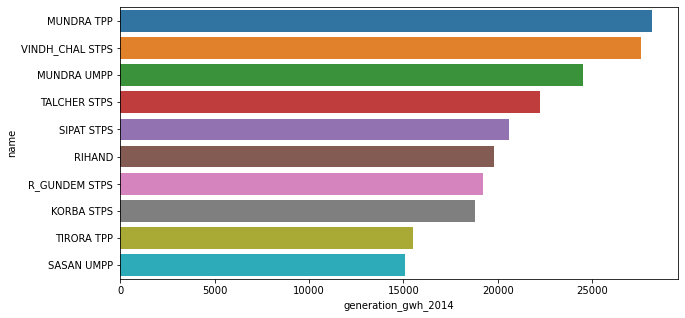

In [253]:


plt.figure(figsize=(10,5))
sns.barplot(x="generation_gwh_2014",
           y="name",
           data=df.nlargest(10,"generation_gwh_2014"))

plt.show()

-Mundra TTP, Vindh_chal stps, mundra UMPP are the top generation of energy in gwh. They have produced more than 25K gwh energy in 2014.

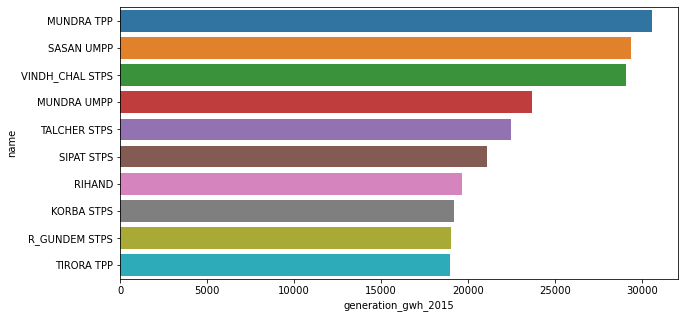

In [254]:

plt.figure(figsize=(10,5))
sns.barplot(x="generation_gwh_2015",
           y="name",
           data=df.nlargest(10,"generation_gwh_2015"))

plt.show()

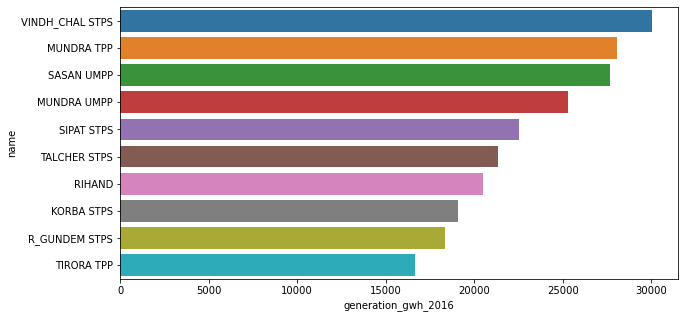

In [255]:

plt.figure(figsize=(10,5))
sns.barplot(x="generation_gwh_2016",
           y="name",
           data=df.nlargest(10,"generation_gwh_2016"))

plt.show()

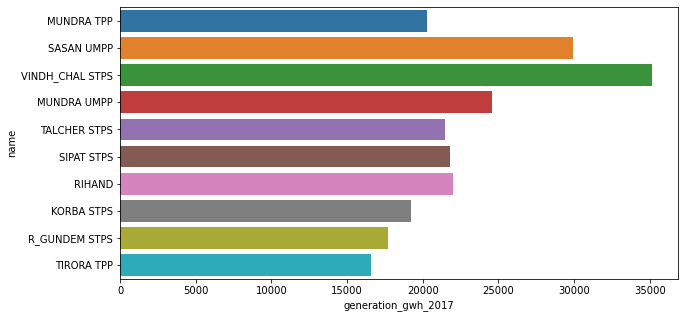

In [256]:

plt.figure(figsize=(10,5))
sns.barplot(x="generation_gwh_2017",
           y="name",
           data=df.nlargest(10,"generation_gwh_2015"))

plt.show()

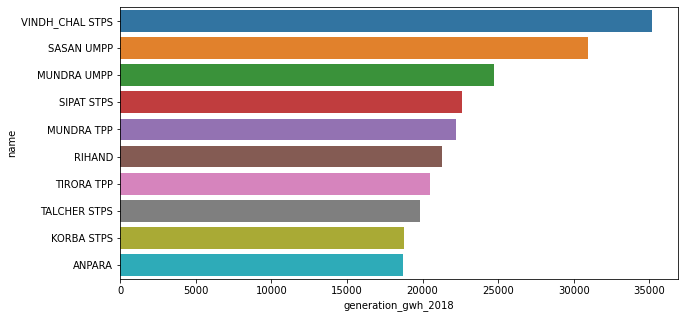

In [257]:

plt.figure(figsize=(10,5))
sns.barplot(x="generation_gwh_2018",
           y="name",
           data=df.nlargest(10,"generation_gwh_2018"))

plt.show()

From all above graph it is observed that VINDH_CHAL STPS, SASAN UMPP, Mundra UMPP are generating highest gwh in every year.

In [258]:
#Filling the Null Values using mode method.

In [259]:
df["other_fuel1"]=df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["commissioning_year"]=df["commissioning_year"].fillna(df["commissioning_year"].mode()[0])
df["year_of_capacity_data"]=df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].mode()[0])
df["generation_gwh_2014"]=df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"]=df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"]=df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"]=df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mode())
df["generation_gwh_2018"]=df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())
df["generation_data_source"]=df["generation_data_source"].fillna(df["generation_data_source"].mode()[0])
df["owner"]=df["owner"].fillna(df["owner"].mode()[0])


In [260]:
#Dropping less nos. of null values present in dataset
df=df.dropna()

In [261]:
df.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [262]:
#Finding the shape of data
df.shape

(429, 21)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 902
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 429 non-null    object 
 1   country_long            429 non-null    object 
 2   name                    429 non-null    object 
 3   gppd_idnr               429 non-null    object 
 4   capacity_mw             429 non-null    float64
 5   latitude                429 non-null    float64
 6   longitude               429 non-null    float64
 7   primary_fuel            429 non-null    object 
 8   other_fuel1             429 non-null    object 
 9   commissioning_year      429 non-null    float64
 10  owner                   429 non-null    object 
 11  source                  429 non-null    object 
 12  url                     429 non-null    object 
 13  geolocation_source      429 non-null    object 
 14  year_of_capacity_data   429 non-null    fl

In [264]:
#Dropping country column as it will not impact on model trainig
df=df.drop(["country","url"],axis=1)

In [265]:
df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,0.000000,751.644375,Central Electricity Authority
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
5,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,Central Electricity Authority
6,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Oil,1970.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150,Central Electricity Authority


# Data Encoding using label encoder

In [266]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [267]:
cols=["country_long","name","gppd_idnr","primary_fuel","other_fuel1","owner","source","geolocation_source","generation_data_source"]

df[cols]=df[cols].apply(LabelEncoder().fit_transform)

df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,428,2.5,28.1839,73.2407,5,2,2011.0,1,1,0,2019.0,801.123775,711.181225,737.205450,0.000000,751.644375,0
3,0,1,0,135.0,23.8712,91.3602,1,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,2,1,1800.0,21.9603,82.4091,0,2,2015.0,0,0,1,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
5,0,3,2,250.0,23.7689,68.6447,0,2,2005.0,0,0,1,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,0
6,0,4,3,60.0,10.4547,77.0078,2,2,1970.0,0,0,1,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150,0


<AxesSubplot:>

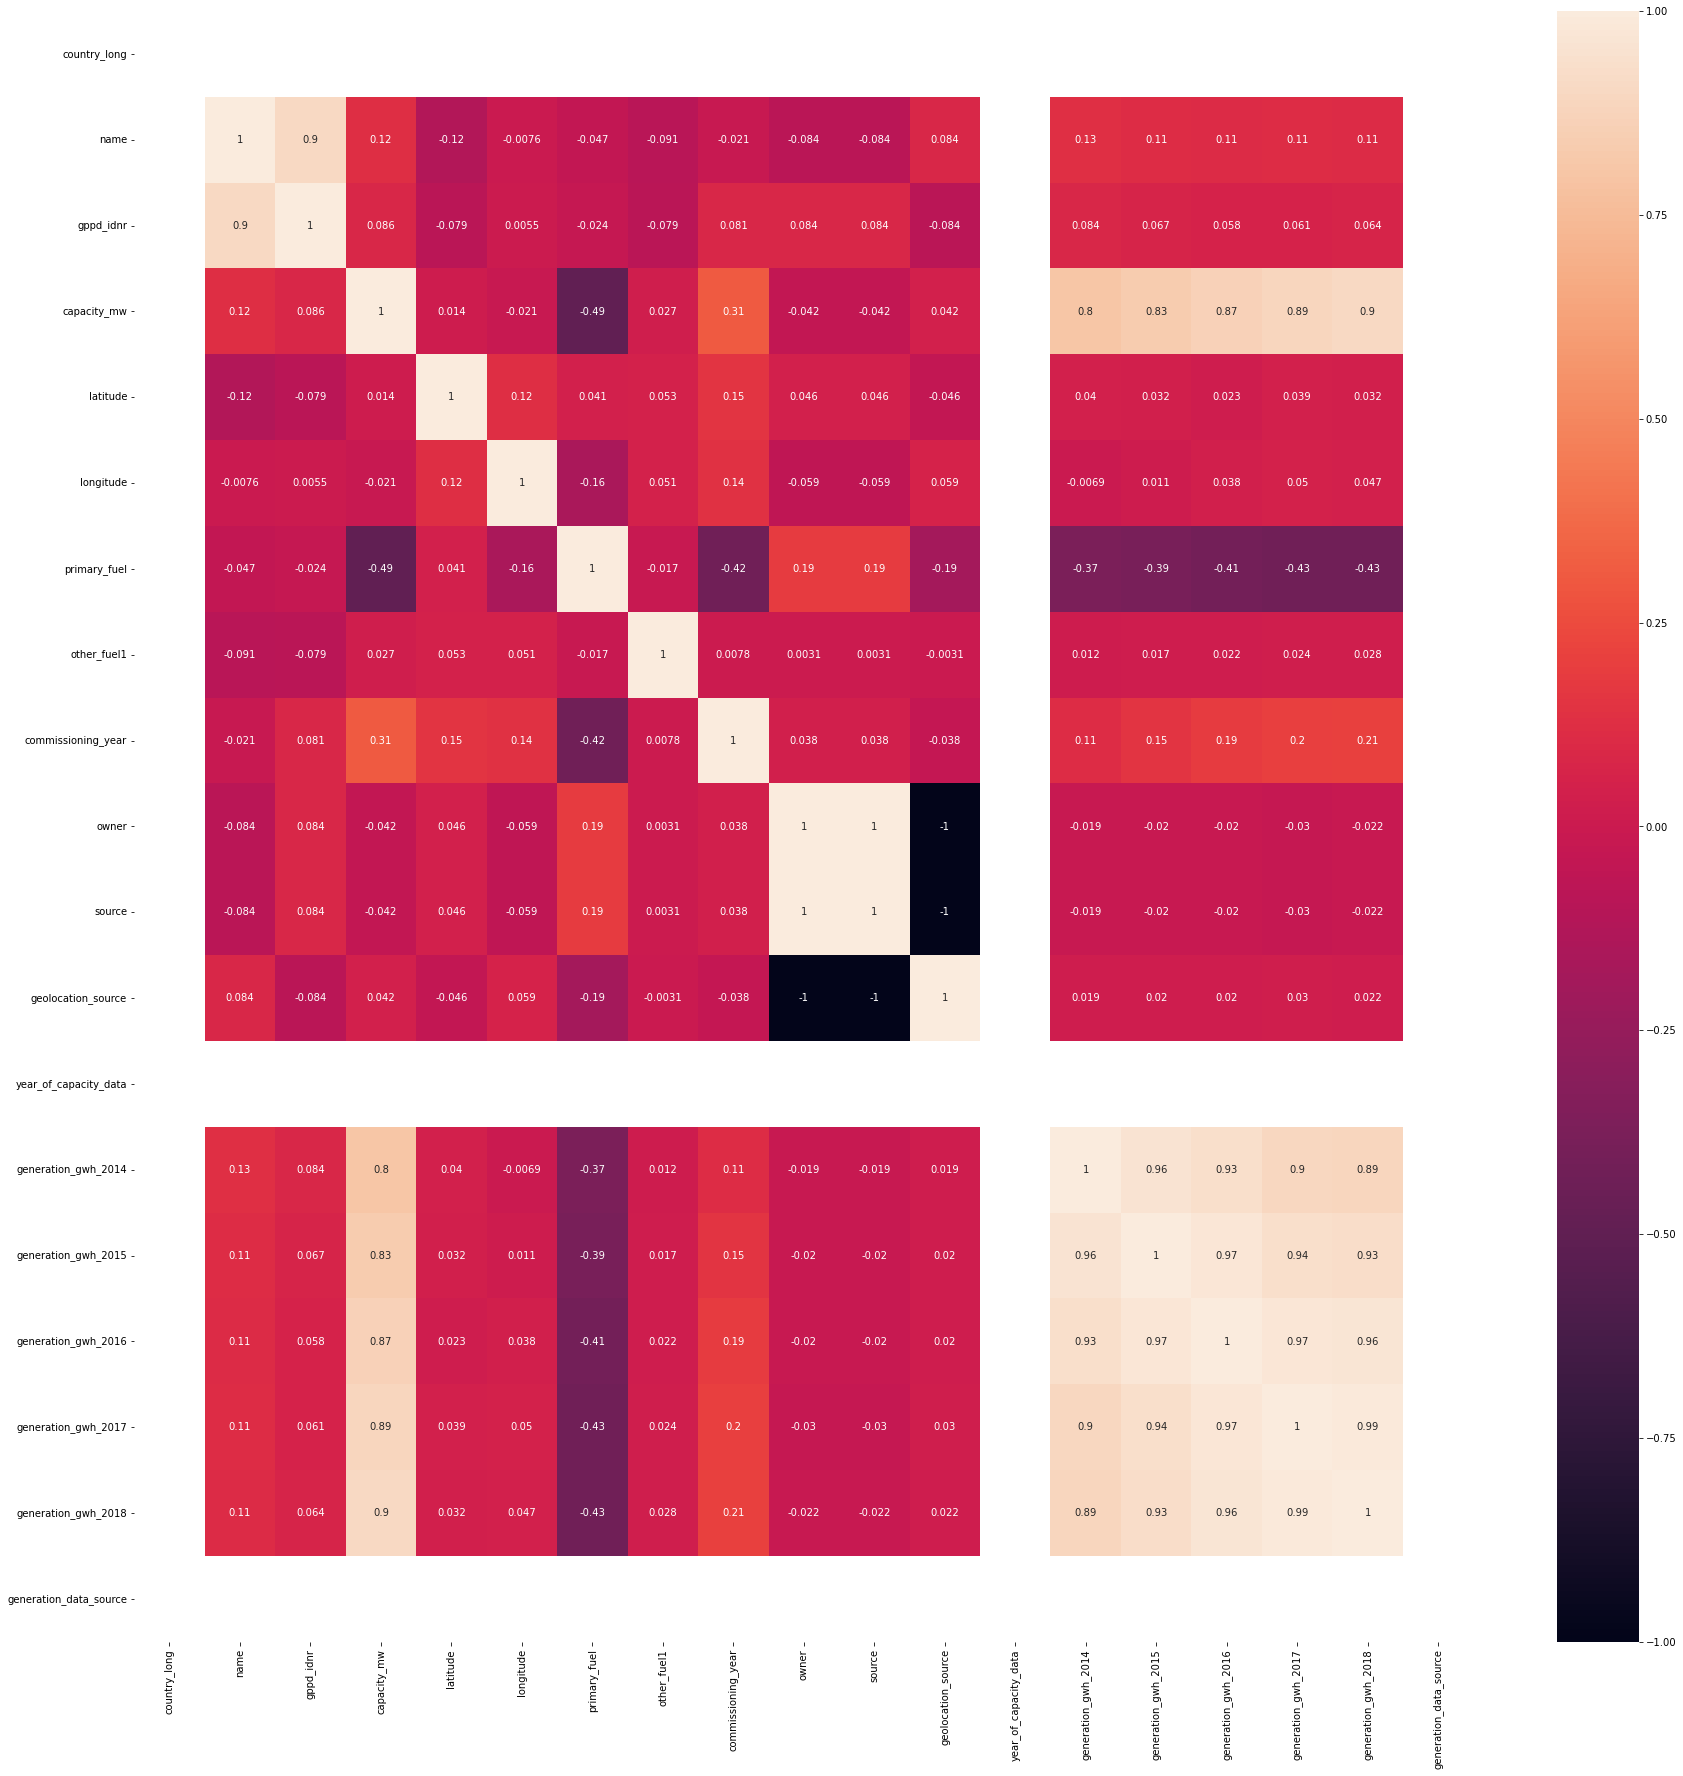

In [268]:
#Finding the correlationship between dataset using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

# Scaling using Standard scalar

In [269]:
x=df.drop("primary_fuel", axis=1)
y=df["primary_fuel"]

In [270]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [271]:
#Finding Variance inflation factor to check multicolinearity

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,NaN,country_long
1,6.612588,name
2,6.543725,gppd_idnr
3,6.196571,capacity_mw
4,1.076411,latitude
5,1.089527,longitude
6,1.014907,other_fuel1
7,1.319156,commissioning_year
8,inf,owner
9,inf,source


In [272]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

In [273]:
# Write a function & call to check accuracy score of different model

def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n =============Train Result===============")
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("\n =============Test Result================")
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n classification report \n", classification_report(y_test, pred, digits=2))
        

# Descision Tree

In [274]:
#Model initialization
# Trying for Decision tree Classifier

clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [275]:
# Call the function & pass the data set into it.

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score


 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:80.56%

 
 classification report 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        46
           1       0.56      0.31      0.40        16
           2       0.89      0.91      0.90        45
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

    accuracy                           0.81       108
   macro avg       0.45      0.42      0.43       108
weighted avg       0.80      0.81      0.80       108



In [276]:
#Tunning four important parameters & passing different values for both parameters
grid_param={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [277]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [278]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [279]:
#Finding the best parameters
best_parameters=grid_search.best_params_

print(best_parameters)


{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [280]:
#Initiating new parameters in decision tree classifier & train

clf=DecisionTreeClassifier(criterion= "gini", max_depth= 10,min_samples_split=4, max_leaf_nodes= 9, min_samples_leaf=2 )

#training of model

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=4)

In [281]:
#Now call the function & pass the data set & train the model

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score



 =============Train Result===============
Accuracy score:79.75%

 =============Test Result================
Accuracy score:75.00%

 
 classification report 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        46
           1       0.36      0.25      0.30        16
           2       0.81      0.76      0.78        45
           3       0.00      0.00      0.00         1

    accuracy                           0.75       108
   macro avg       0.49      0.49      0.48       108
weighted avg       0.72      0.75      0.73       108



In [282]:
#Predicting y_pred

y_pred=clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1])

In [283]:
#Plotting confusion matrix.

conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[43,  0,  3,  0],
       [ 7,  4,  5,  0],
       [ 4,  7, 34,  0],
       [ 1,  0,  0,  0]], dtype=int64)

In [285]:
#Saving the model in local file system 
import pickle

pickle.dump(clf, open("clf", "wb"))

In [286]:
loaded_model=pickle.load(open("clf", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

75.0


In [287]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
Predicted,0,0,1,1,2,0,2,2,0,0,...,0,0,2,0,1,0,0,0,0,1
Original,1,0,2,1,2,0,2,2,0,0,...,0,0,2,0,2,1,2,0,0,1


In [300]:
x.head(2)

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,428,2.5,28.1839,73.2407,2,2011.0,1,1,0,2019.0,801.123775,711.181225,737.205450,0.0000,751.644375,0
3,0,1,0,135.0,23.8712,91.3602,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.7745,626.239128,0


In [301]:
y.head(2)

0    5
3    1
Name: primary_fuel, dtype: int32

In [302]:
print("Prediction of Primary Fuel:  ", clf.predict(scalar.transform([[0,0,428,2.5,28.1839,73.2407,2,2011.0,1,1,0,2019.0,801.123775,711.181225,737.205450,0.000000,751.644375,0]])))



print("Prediction of Primary Fuel:  ", clf.predict(scalar.transform([[0,1,0,135.0,23.8712,91.3602,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0]])))

Prediction of Primary Fuel:   [2]
Prediction of Primary Fuel:   [1]


# Using KNN Classifier

In [303]:
#Initiate Kneighbor classifier
knn=KNeighborsClassifier()

#Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [304]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:79.44%

 =============Test Result================
Accuracy score:70.37%

 
 classification report 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        46
           1       0.38      0.19      0.25        16
           2       0.70      0.82      0.76        45
           3       0.00      0.00      0.00         1

    accuracy                           0.70       108
   macro avg       0.46      0.45      0.45       108
weighted avg       0.68      0.70      0.68       108



In [305]:
#cross validationscore to check if the model is overfitting
from sklearn.model_selection import KFold, cross_val_score

cross_val_score(knn,x_scaled,y, cv=5)


array([0.65116279, 0.70930233, 0.73255814, 0.70930233, 0.69411765])

In [306]:
cross_val_score(KNeighborsClassifier(),x_scaled,y, cv=5).mean()

0.6992886456908345

In [307]:
from sklearn.model_selection import GridSearchCV

In [308]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[3,5,6,7,8],
           "n_neighbors": [3,5,7,9,11,13]}

In [309]:
gridsearch=GridSearchCV(estimator=knn, param_grid=param_grid)

In [310]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [311]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [312]:
#We will use best parameters in our knn & check accuracy is increasing
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=3, n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [313]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:86.29%

 =============Test Result================
Accuracy score:74.07%

 
 classification report 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        46
           1       0.43      0.19      0.26        16
           2       0.73      0.84      0.78        45
           3       0.00      0.00      0.00         1

    accuracy                           0.74       108
   macro avg       0.49      0.47      0.47       108
weighted avg       0.71      0.74      0.71       108



In [314]:
print("Prediction of Primary Fuel:  ", knn.predict(scalar.transform([[0,0,428,2.5,28.1839,73.2407,2,2011.0,1,1,0,2019.0,801.123775,711.181225,737.205450,0.000000,751.644375,0]])))



print("Prediction of Primary Fuel:  ", knn.predict(scalar.transform([[0,1,0,135.0,23.8712,91.3602,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0]])))

Prediction of Primary Fuel:   [1]
Prediction of Primary Fuel:   [1]


# Random Forest

In [315]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [316]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:80.56%

 
 classification report 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        46
           1       0.80      0.25      0.38        16
           2       0.83      0.96      0.89        45
           3       0.00      0.00      0.00         1

    accuracy                           0.81       108
   macro avg       0.60      0.52      0.52       108
weighted avg       0.80      0.81      0.78       108



# Lets tune parameters using GridSearchCV

In [317]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [318]:
random_clf=RandomForestClassifier(criterion= 'entropy', max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15)


random_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [319]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:86.29%

 =============Test Result================
Accuracy score:81.48%

 
 classification report 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        46
           1       0.80      0.25      0.38        16
           2       0.80      0.96      0.87        45
           3       0.00      0.00      0.00         1

    accuracy                           0.81       108
   macro avg       0.61      0.52      0.53       108
weighted avg       0.81      0.81      0.79       108



In [320]:
print("Prediction of Primary Fuel:  ", random_clf.predict(scalar.transform([[0,0,428,2.5,28.1839,73.2407,2,2011.0,1,1,0,2019.0,801.123775,711.181225,737.205450,0.000000,751.644375,0]])))



print("Prediction of Primary Fuel:  ", random_clf.predict(scalar.transform([[0,1,0,135.0,23.8712,91.3602,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0]])))

Prediction of Primary Fuel:   [2]
Prediction of Primary Fuel:   [1]


# Logistic Regression

In [321]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [322]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2])

In [323]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.7129629629629629

In [324]:
from sklearn.metrics import classification_report

In [325]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        46
           1       0.43      0.19      0.26        16
           2       0.69      0.82      0.75        45
           3       0.00      0.00      0.00         1

    accuracy                           0.71       108
   macro avg       0.48      0.45      0.45       108
weighted avg       0.68      0.71      0.69       108



In [326]:
print("Prediction of Primary Fuel:  ", random_clf.predict(scalar.transform([[0,0,428,2.5,28.1839,73.2407,2,2011.0,1,1,0,2019.0,801.123775,711.181225,737.205450,0.000000,751.644375,0]])))



print("Prediction of Primary Fuel:  ", random_clf.predict(scalar.transform([[0,1,0,135.0,23.8712,91.3602,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0]])))

Prediction of Primary Fuel:   [2]
Prediction of Primary Fuel:   [1]


# Final model loading & prediction Actual Vs Predicted

In [327]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("rf", "wb"))

In [328]:
loaded_model=pickle.load(open("rf", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

81.48148148148148


In [329]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
Predicted,2,0,2,1,2,0,2,2,0,0,...,0,0,2,0,2,1,2,0,0,1
Original,1,0,2,1,2,0,2,2,0,0,...,0,0,2,0,2,1,2,0,0,1


# Now Prediction of capacity_mw

In [330]:
X=df.drop(columns=["capacity_mw"], axis=1)
y1=df["capacity_mw"]

In [331]:
#Scaling of dataset
scalar=StandardScaler()
x_scaler=scalar.fit_transform(X)

In [332]:
#Finding Variance inflation factor to check multicolinearity

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaler, i) for i in range(x_scaler.shape[1])]
vif["features"]=X.columns

vif


,vif,features
0,NaN,country_long
1,6.610456,name
2,6.552181,gppd_idnr
3,1.096949,latitude
4,1.068518,longitude
5,1.573304,primary_fuel
6,1.014530,other_fuel1
7,1.419361,commissioning_year
8,inf,owner
9,inf,source


In [357]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y1, test_size=0.25, random_state=1)

# Using Linear Regression

In [358]:
lr = LinearRegression()
lr.fit(x_train,y_train)

print("R2 of Linear Regresson:", lr.score(x_train,y_train) )
print("----- Prediction Accuracy-----")
print('MAE: ',metrics.mean_absolute_error(y_test, lr.predict(x_test)))
print('MSE: ',metrics.mean_squared_error(y_test, lr.predict(x_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, lr.predict(x_test))))

R2 of Linear Regresson: 0.8438098845682781
----- Prediction Accuracy-----
MAE:  201.34268409217614
MSE:  72535.73473387289
RMSE: 269.32458991683785


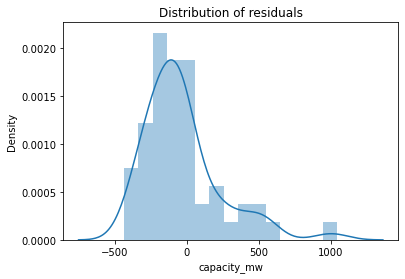

In [359]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - lr.predict(x_test))
plt.title('Distribution of residuals')
plt.show()

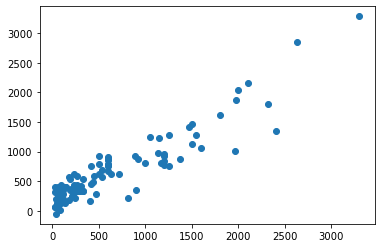

In [360]:
plt.scatter(y_test,lr.predict(x_test));

In [361]:
#Checking training score

lr.score(x_train, y_train)

0.8438098845682781

In [362]:
#Checking testing score

lr.score(x_test, y_test)

0.8390565075910246

In [363]:

y_pred=lr.predict(x_test)
y_pred

array([ 281.59900674,  684.84966534,  342.80522225,  284.47929227,
        440.39110531, 1355.06742619,  282.83493438,   86.86366585,
        615.63857493, 3288.1519847 ,  878.19589334,  934.25075209,
        347.13105352,  858.49338972,  336.68493473,  488.38050374,
        879.4078343 ,   70.67777845,  588.41766214,  438.94401789,
        591.21064743,  447.46698699,  337.57724689, 1008.5550797 ,
       1241.14754625,  202.21905766,  324.92694331,  213.64126349,
          8.04134746,  756.70066423,  803.29606347,  953.54047447,
        756.30902822,  189.94595056,  406.79177983, 1801.79963254,
        270.29311006,  904.38789451,  156.70984506,  881.06969458,
        759.64631025,  440.83122251,  202.78327101,  282.0360801 ,
        207.36763252,  628.21737405,  540.00266518,  330.18587622,
        123.32152442,  170.56393484, 2048.00092294, 1288.16163084,
        158.87303023, 1125.24092889,  834.93832469,  237.75516217,
        369.19682878,  335.37473947,  343.24853258, 1235.84522

In [364]:
pred_train=lr.predict(x_train)
pred_train

array([ 1.44589995e+02,  3.47405265e+02,  1.59669416e+02,  2.15895595e+02,
        2.26825596e+02,  7.41872370e+02,  1.15783581e+03,  4.09486885e+02,
        5.51143641e+02,  5.51216448e+02,  1.37768760e+02,  4.09854877e+02,
        4.11909832e+02,  2.71440710e+02,  4.13529438e+02,  7.55123912e+02,
        7.11403246e+02,  2.35699577e+03,  8.37678177e+02,  1.93024369e+02,
        5.63463262e+02,  2.65751532e+02,  2.72525346e+03,  5.22855715e+02,
        2.96649966e+02,  1.11897465e+03,  8.69513840e+02,  1.98396908e+02,
        1.05611483e+03,  1.43170165e+02,  5.92712559e+02,  1.36560303e+02,
        1.75191894e+03,  1.91952973e+02,  2.82367787e+03,  1.09882591e+03,
        6.25913252e+02,  4.39774445e+02,  4.06769307e+02,  5.31274853e+02,
        4.00764279e+02,  2.45362809e+02,  3.38486347e+02,  1.45896478e+03,
        4.12164653e+02,  6.10139725e+02,  6.25502750e+02,  1.45418228e+03,
        2.73097858e+02,  1.15992090e+02,  2.09381363e+03,  4.90984823e+01,
        4.53107564e+02,  

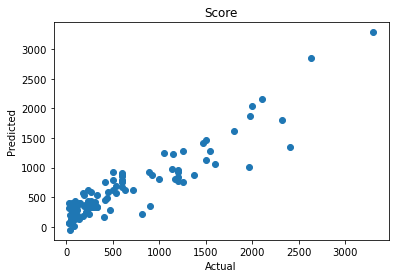

In [365]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [366]:
X.head(3)

,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,428,28.1839,73.2407,5,2,2011.0,1,1,0,2019.0,801.123775,711.181225,737.205450,0.000000,751.644375,0
3,0,1,0,23.8712,91.3602,1,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,2,1,21.9603,82.4091,0,2,2015.0,0,0,1,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


In [367]:
y1.head(3)

0       2.5
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [368]:
print("Prediction of Primary Fuel:  ", lr.predict(scalar.transform([[0,2,1,21.9603,82.4091,0,2,2015.0,0,0,1,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0]])))



print("Prediction of Primary Fuel:  ", lr.predict(scalar.transform([[0,1,0,23.8712,91.3602,1,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0]])))

Prediction of Primary Fuel:   [1365.47502789]
Prediction of Primary Fuel:   [191.04414953]


# using knn regressor

In [369]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y1, test_size=0.25, random_state=1)

In [370]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [371]:
#Checking training score

knn.score(x_train, y_train)

0.8523462756053453

In [372]:
#Checking testing score

knn.score(x_test, y_test)

0.7443513655935128

In [373]:

y_pred=knn.predict(x_test)
y_pred

array([ 119.391 ,  736.    ,  102.4   ,  388.2   ,  220.8   , 1584.    ,
        275.91  ,  243.4   ,  559.4   , 2716.    ,  616.    ,  661.9862,
        198.8   , 1124.    ,  156.66  ,  453.2   ,  451.204 ,   84.01  ,
        320.    ,  275.2   ,  638.072 ,  543.    ,  423.4732,  605.972 ,
       1142.    ,  114.8   ,  196.2   ,  166.2   ,  130.44  ,  828.    ,
        496.    ,  898.    ,  616.    ,  207.    ,  261.2   , 1362.    ,
        162.11  ,  644.    ,  109.    ,  483.    ,  675.956 ,  978.    ,
        115.8   ,  599.3428,  105.2   ,  287.    ,  394.204 ,   69.3   ,
        140.06  ,  106.55  , 1774.    , 1516.    ,  106.2   , 1082.    ,
        870.    ,  159.2   ,  222.2   ,   75.2   ,  106.2   , 1110.4   ,
        267.6   , 1188.    ,  740.6   ,  740.6   ,  431.2   ,   39.04  ,
        246.72  ,  202.5   ,  113.6   ,  974.    ,  632.    ,  285.404 ,
        410.5   , 1342.    ,  412.4   ,  106.66  ,  123.36  ,  992.6   ,
       1213.32  , 1684.    ,  716.8   ,  314.    , 

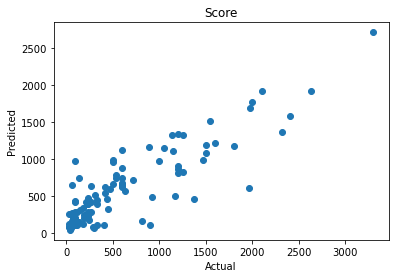

In [374]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [375]:
#Mean square error
mean_absolute_error(y_test, y_pred)

229.51648703703702

In [376]:
#MSE
mean_absolute_error(y_test, y_pred)

229.51648703703702

In [377]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

339.43844974917624

In [378]:
r2_score(y_test, y_pred)

0.7443513655935128

In [379]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [380]:
cv_score=cross_val_score(knn, x_scaled, y, cv=4)
cv_score

array([0.36392429, 0.30217391, 0.27317927, 0.34128125])

In [381]:
cv_mean=cv_score.mean()
cv_mean

0.3201396812432455

In [382]:
print("Prediction of Primary Fuel:  ", knn.predict(scalar.transform([[0,2,1,21.9603,82.4091,0,2,2015.0,0,0,1,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0]])))



print("Prediction of Primary Fuel:  ", knn.predict(scalar.transform([[0,1,0,23.8712,91.3602,1,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0]])))

Prediction of Primary Fuel:   [1304.]
Prediction of Primary Fuel:   [351.4]


# Ada Boost Regressor

In [383]:
from sklearn.ensemble import AdaBoostRegressor

In [384]:
ada=AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [385]:
#Model Prediction on train data
y_pred=ada.predict(x_train)


In [386]:
accuracy=metrics.r2_score(y_train, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.8710691023909781


In [387]:
#Model Prediction on test data
y_pred=ada.predict(x_test)


In [388]:
accuracy=metrics.r2_score(y_test, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.7565360956150586


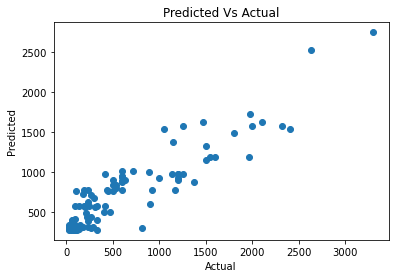

In [389]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted Vs Actual")
plt.show()

In [390]:
#Mean square error
mean_absolute_error(y_test, y_pred)

293.7853170969315

In [391]:
#MSE
mean_absolute_error(y_test, y_pred)

293.7853170969315

In [392]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

331.2505346483217

In [393]:
r2_score(y_test, y_pred)

0.7565360956150586

In [394]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [396]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler, y1, test_size=0.25, random_state=20)

In [397]:
cv_score=cross_val_score(ada, x_scaled, y, cv=4)
cv_score

array([0.37734722, 0.40288886, 0.20751746, 0.36734748])

In [398]:
cv_mean=cv_score.mean()
cv_mean

0.3387752554438975

In [399]:
print("Prediction of Primary Fuel:  ", knn.predict(scalar.transform([[0,2,1,21.9603,82.4091,0,2,2015.0,0,0,1,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0]])))



print("Prediction of Primary Fuel:  ", knn.predict(scalar.transform([[0,1,0,23.8712,91.3602,1,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0]])))

Prediction of Primary Fuel:   [1304.]
Prediction of Primary Fuel:   [351.4]


# Using Random Forest

In [400]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [401]:
#Checking training score

rf.score(x_train, y_train)

0.9770746872398083

In [402]:
#Checking testing score

rf.score(x_test, y_test)

0.8558603194406555

In [403]:

y_pred=rf.predict(x_test)
y_pred

array([ 201.55145,   59.8475 , 1365.22   ,  631.1926 ,   58.777  ,
         65.4635 , 1280.075  ,  267.2816 , 1557.7    ,  369.89505,
        180.7801 ,   65.1075 , 1542.6    ,  671.86   ,  813.7473 ,
       1918.4    , 1188.719  ,  373.8174 ,  203.9029 ,  786.193  ,
       1339.705  ,  521.487  ,  131.3353 , 1422.538  ,  112.2988 ,
        483.474  ,  623.146  ,  191.72715,  241.6975 ,  992.536  ,
        711.345  ,  800.47   ,  346.89322,  547.558  ,  880.02   ,
        543.20841,  110.8028 ,  579.95742,  565.68   ,  346.57535,
        223.8522 ,  296.8289 ,   56.3365 ,  121.911  , 1252.846  ,
        375.575  , 1176.29   ,  288.44036, 1452.495  ,  178.6795 ,
       1295.04   , 2866.4    , 1251.5    ,   62.417  , 1588.     ,
        881.476  ,  122.5351 ,  302.5568 , 1536.8    ,  475.8506 ,
       1537.78   ,  605.13971,  499.12   ,  490.657  , 2839.7    ,
        134.588  , 1153.654  ,  447.23605,  451.7302 ,  127.6987 ,
         38.4645 , 3527.     ,  341.1698 ,  245.127  ,  517.  

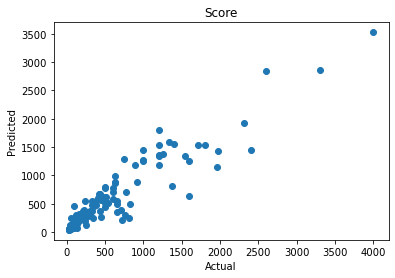

In [404]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [405]:
y_pred= rf.predict(x_test)
y_pred

array([ 201.55145,   59.8475 , 1365.22   ,  631.1926 ,   58.777  ,
         65.4635 , 1280.075  ,  267.2816 , 1557.7    ,  369.89505,
        180.7801 ,   65.1075 , 1542.6    ,  671.86   ,  813.7473 ,
       1918.4    , 1188.719  ,  373.8174 ,  203.9029 ,  786.193  ,
       1339.705  ,  521.487  ,  131.3353 , 1422.538  ,  112.2988 ,
        483.474  ,  623.146  ,  191.72715,  241.6975 ,  992.536  ,
        711.345  ,  800.47   ,  346.89322,  547.558  ,  880.02   ,
        543.20841,  110.8028 ,  579.95742,  565.68   ,  346.57535,
        223.8522 ,  296.8289 ,   56.3365 ,  121.911  , 1252.846  ,
        375.575  , 1176.29   ,  288.44036, 1452.495  ,  178.6795 ,
       1295.04   , 2866.4    , 1251.5    ,   62.417  , 1588.     ,
        881.476  ,  122.5351 ,  302.5568 , 1536.8    ,  475.8506 ,
       1537.78   ,  605.13971,  499.12   ,  490.657  , 2839.7    ,
        134.588  , 1153.654  ,  447.23605,  451.7302 ,  127.6987 ,
         38.4645 , 3527.     ,  341.1698 ,  245.127  ,  517.  

In [406]:
#Mean square error
mean_absolute_error(y_test, y_pred)

186.3809731481481

In [407]:
#MSE
mean_absolute_error(y_test, y_pred)

186.3809731481481

In [408]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

269.6251477504603

In [409]:
r2_score(y_test, y_pred)

0.8558603194406555

In [411]:
cv_score=cross_val_score(rf, x_scaled, y, cv=5)
cv_score

array([0.60279989, 0.5871158 , 0.53841273, 0.51718406, 0.28165029])

In [412]:
cv_score.mean()

0.5054325515456827

In [413]:
print("Prediction of Primary Fuel:  ", rf.predict(scalar.transform([[0,2,1,21.9603,82.4091,0,2,2015.0,0,0,1,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0]])))



print("Prediction of Primary Fuel:  ", rf.predict(scalar.transform([[0,1,0,23.8712,91.3602,1,2,2004.0,0,0,1,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0]])))

Prediction of Primary Fuel:   [1537.78]
Prediction of Primary Fuel:   [197.1606]


From above random forest is giving us good prediction score

# Finalising the model for prediction

In [420]:
#Saving the model in local file system 
import pickle

pickle.dump(rf, open("rf", "wb"))

In [421]:
#Prediction using the saved model

loaded_model=pickle.load(open("rf", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

85.58603194406555


In [422]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
Predicted,201.55145,59.8475,1365.22,631.1926,58.777,65.4635,1280.075,267.2816,1557.7,369.89505,...,46.627,464.47042,294.30385,241.8833,43.513,674.96,862.406,548.97571,1448.923,265.1875
Original,161.00000,36.0000,1200.00,1600.0000,60.000,60.0000,1000.000,186.0000,1400.0,431.58600,...,30.000,351.43000,768.00000,350.0000,32.000,440.00,630.000,240.00000,2400.000,445.6740
